In [55]:
!pip install tensorflow


In [56]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras



X_train shape: (800, 2)
y_train shape: (800, 1)
W1 shape: (2, 10)
b1 shape: (1, 10)
W2 shape: (10, 1)
b2 shape: (1, 1)
Epoch 0: Loss = 0.9556, Accuracy = 0.5075
Epoch 100: Loss = 0.3618, Accuracy = 0.8938
Epoch 200: Loss = 0.2595, Accuracy = 0.9788
Epoch 300: Loss = 0.2051, Accuracy = 0.9925
Epoch 400: Loss = 0.1713, Accuracy = 0.9938
Epoch 500: Loss = 0.1483, Accuracy = 0.9925
Epoch 600: Loss = 0.1317, Accuracy = 0.9925
Epoch 700: Loss = 0.1191, Accuracy = 0.9925
Epoch 800: Loss = 0.1092, Accuracy = 0.9938
Epoch 900: Loss = 0.1012, Accuracy = 0.9938


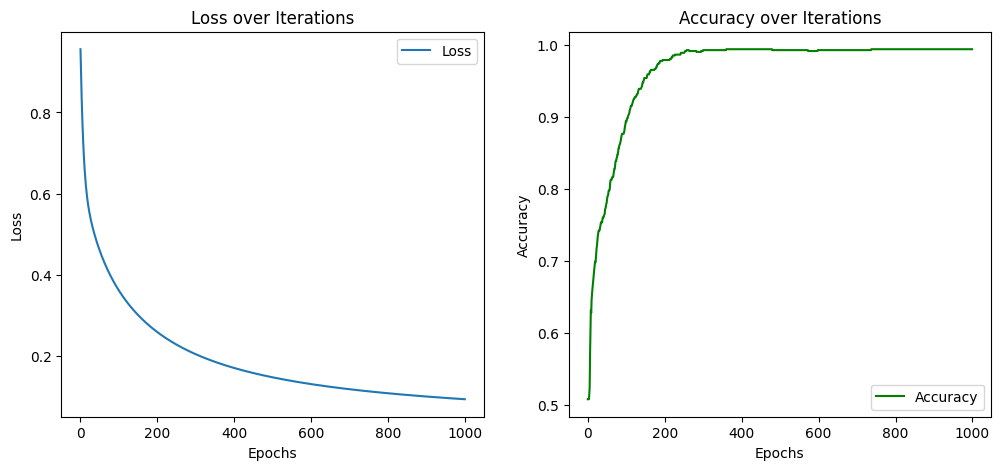

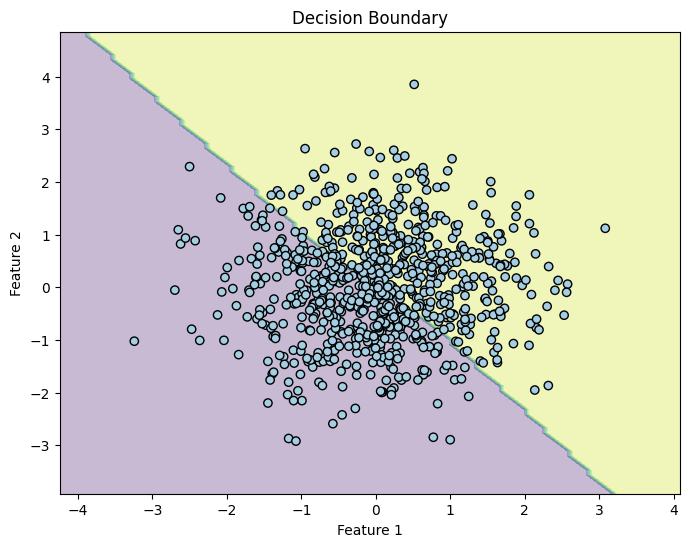

Epoch 1/1000
25/25 [==============================] - 0s 632us/step - loss: 0.7341 - accuracy: 0.4925
Epoch 2/1000
25/25 [==============================] - 0s 536us/step - loss: 0.7077 - accuracy: 0.4925
Epoch 3/1000
25/25 [==============================] - 0s 681us/step - loss: 0.6855 - accuracy: 0.5150
Epoch 4/1000
25/25 [==============================] - 0s 612us/step - loss: 0.6670 - accuracy: 0.6762
Epoch 5/1000
25/25 [==============================] - 0s 638us/step - loss: 0.6497 - accuracy: 0.7937
Epoch 6/1000
25/25 [==============================] - 0s 491us/step - loss: 0.6336 - accuracy: 0.8313
Epoch 7/1000
25/25 [==============================] - 0s 593us/step - loss: 0.6175 - accuracy: 0.8650
Epoch 8/1000
25/25 [==============================] - 0s 572us/step - loss: 0.6019 - accuracy: 0.8838
Epoch 9/1000
25/25 [==============================] - 0s 547us/step - loss: 0.5863 - accuracy: 0.8938
Epoch 10/1000
25/25 [==============================] - 0s 568us/step - loss: 0.571

In [57]:
# Sigmoid activation and derivative
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

# Forward propagation
def forward_propagation(X):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    return Z1, A1, Z2, A2

# Loss function
def compute_loss(A2, Y):
    m = Y.shape[0]
    return -np.sum(Y * np.log(A2 + 1e-8) + (1 - Y) * np.log(1 - A2 + 1e-8)) / m

# Compute accuracy
def compute_accuracy(A2, Y):
    predictions = (A2 >= 0.5).astype(int)
    return np.mean(predictions == Y)

# Backpropagation
def back_propagation(X, Y, Z1, A1, Z2, A2):
    global W1, b1, W2, b2
    m = X.shape[0]
    
    dZ2 = A2 - Y  # (800,1)
    dW2 = np.dot(A1.T, dZ2) / m  # (10,800) x (800,1) = (10,1)
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m  # (1,1)
    
    dZ1 = np.dot(dZ2, W2.T) * sigmoid_derivative(Z1)  # (800,1) x (1,10) = (800,10)
    dW1 = np.dot(X.T, dZ1) / m  # (2,800) x (800,10) = (2,10)
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m  # (1,10)
    
    # Update weights
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

# Decision boundary plotting
def plot_decision_boundary(X, y, model_forward):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    X_grid = np.c_[xx.ravel(), yy.ravel()]
    _, _, _, A2 = model_forward(X_grid)
    Z = (A2 >= 0.5).astype(int).reshape(xx.shape)
    
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.Paired)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary")
    plt.show()

# Training function
def train():
    losses, accuracies = [], []
    for epoch in range(epochs):
        Z1, A1, Z2, A2 = forward_propagation(X_train)
        loss = compute_loss(A2, y_train)
        acc = compute_accuracy(A2, y_train)
        losses.append(loss)
        accuracies.append(acc)
        back_propagation(X_train, y_train, Z1, A1, Z2, A2)
        
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Loss = {loss:.4f}, Accuracy = {acc:.4f}")
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(losses, label="Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Loss over Iterations")
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(accuracies, label="Accuracy", color='g')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Accuracy over Iterations")
    plt.legend()
    plt.show()
    
    plot_decision_boundary(X_train, np.argmax(y_train, axis=1), forward_propagation)

# TensorFlow Implementation
def tensorflow_model():
    model = keras.Sequential([
        keras.layers.Dense(10, activation='sigmoid', input_shape=(X_train.shape[1],)),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=epochs, verbose=1)
    return model

# Initialize Parameters
input_dim = 2
hidden_dim = 10
output_dim = 1
learning_rate = 0.1
epochs = 1000

W1 = np.random.randn(input_dim, hidden_dim)
b1 = np.zeros((1, hidden_dim))
W2 = np.random.randn(hidden_dim, output_dim)
b2 = np.zeros((1, output_dim))

# Generate Dummy Data
np.random.seed(42)
X_train = np.random.randn(800, 2)
y_train = (X_train[:, 0] + X_train[:, 1] > 0).astype(int)  # Simple classification rule
y_train = y_train.reshape(-1, 1)  # ✅ Fix shape issue

# Print Shapes for Debugging
print("X_train shape:", X_train.shape)  # Expected: (800,2)
print("y_train shape:", y_train.shape)  # Expected: (800,1)
print("W1 shape:", W1.shape)  # Expected: (2,10)
print("b1 shape:", b1.shape)  # Expected: (1,10)
print("W2 shape:", W2.shape)  # Expected: (10,1)
print("b2 shape:", b2.shape)  # Expected: (1,1)

# Train the Model
train()
tensorflow_model()
